In [577]:
from urllib.request import Request, urlopen, urlretrieve

In [578]:
urllib.request.urlretrieve

<function urllib.request.urlretrieve(url, filename=None, reporthook=None, data=None)>

In [579]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

In [580]:
FILE = './auto-mpg.data'

In [581]:
ret = urlretrieve(URL,FILE) # 파일로 그대로 저장 

In [582]:
ret

('./auto-mpg.data', <http.client.HTTPMessage at 0x26a1a79db50>)

In [583]:
# re(정규표현식) -> \s : 화이트 스페이스 
import pandas as pd

df = pd.read_csv(URL, sep='\s+', header = None)

In [584]:
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [585]:
df.info() # horsepower -> object에서 int로 바꿔주기 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       398 non-null    int64  
 2   2       398 non-null    float64
 3   3       398 non-null    object 
 4   4       398 non-null    float64
 5   5       398 non-null    float64
 6   6       398 non-null    int64  
 7   7       398 non-null    int64  
 8   8       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [586]:
df.shape

(398, 9)

In [587]:
# 컬럼명 변경 
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower','weight','acceleration','model year','origin','car name']

In [588]:
# kml
df.insert(1, 'kml', df['mpg']*0.425)
df

,mpg,kml,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,7.650,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,6.375,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,7.650,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,6.800,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,7.225,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,11.475,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,18.700,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,13.600,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,11.900,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


## horsepower 이상치 제거

In [589]:
# horsepower 이상치 제거 
df[df['horsepower']=='?']

,mpg,kml,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,10.6250,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,8.9250,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,17.3825,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,10.0300,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,14.6625,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,9.7750,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [590]:
# '?' string이 있대서 확인 후 없애줌    
sum(df.horsepower=='?')

6

In [591]:
df=df[df.horsepower!='?']

In [592]:
df.horsepower=df['horsepower'].astype('float64')

C:\Users\User\AppData\Local\Temp\ipykernel_15088\2086782923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.horsepower=df['horsepower'].astype('float64')


In [593]:
# 6행 삭제해서 392
df.shape

(392, 10)

In [594]:
# int64로 변환
df.horsepower=df.horsepower.astype('int64')

C:\Users\User\AppData\Local\Temp\ipykernel_15088\1197504229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.horsepower=df.horsepower.astype('int64')


In [595]:
df.describe()

,mpg,kml,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,9.964515,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,3.317128,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.825000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,7.225000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,9.668750,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,12.325000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,19.805000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [596]:
df.head(10)

,mpg,kml,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,7.650,8,307.0,130,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,6.375,8,350.0,165,3693.0,11.5,70,1,buick skylark 320
2,18.0,7.650,8,318.0,150,3436.0,11.0,70,1,plymouth satellite
3,16.0,6.800,8,304.0,150,3433.0,12.0,70,1,amc rebel sst
4,17.0,7.225,8,302.0,140,3449.0,10.5,70,1,ford torino
5,15.0,6.375,8,429.0,198,4341.0,10.0,70,1,ford galaxie 500
6,14.0,5.950,8,454.0,220,4354.0,9.0,70,1,chevrolet impala
7,14.0,5.950,8,440.0,215,4312.0,8.5,70,1,plymouth fury iii
8,14.0,5.950,8,455.0,225,4425.0,10.0,70,1,pontiac catalina
9,15.0,6.375,8,390.0,190,3850.0,8.5,70,1,amc ambassador dpl


## origin 컬럼에 대한 origin_label 컬럼 추가 및 자료형 설정

- 1 : usa, 2 : europe, 3. Asia

In [597]:
df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [598]:
# origin 컬럼 라벨 데이터 생성

originLable = df['origin'].replace({1:'USA', 2:'EU', 3:'JPA'}) 

In [599]:
# origin 컬럼에 대한 라벨 -> 컬럼 추가 

df.insert(1, 'origin_label', originLable)
df

,mpg,origin_label,kml,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,USA,7.650,8,307.0,130,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,USA,6.375,8,350.0,165,3693.0,11.5,70,1,buick skylark 320
2,18.0,USA,7.650,8,318.0,150,3436.0,11.0,70,1,plymouth satellite
3,16.0,USA,6.800,8,304.0,150,3433.0,12.0,70,1,amc rebel sst
4,17.0,USA,7.225,8,302.0,140,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,USA,11.475,4,140.0,86,2790.0,15.6,82,1,ford mustang gl
394,44.0,EU,18.700,4,97.0,52,2130.0,24.6,82,2,vw pickup
395,32.0,USA,13.600,4,135.0,84,2295.0,11.6,82,1,dodge rampage
396,28.0,USA,11.900,4,120.0,79,2625.0,18.6,82,1,ford ranger


In [600]:
df.dtypes

mpg             float64
origin_label     object
kml             float64
cylinders         int64
displacement    float64
horsepower        int64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [601]:
# origin, origin_lable 을 int64/object 기본자료형 => 범주형 category

df[['origin','origin_label']] = df[['origin','origin_label']].astype('category')

C:\Users\User\AppData\Local\Temp\ipykernel_15088\3047980335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['origin','origin_label']] = df[['origin','origin_label']].astype('category')


In [602]:
df.dtypes                                          #카테고리로 바뀜 

mpg              float64
origin_label    category
kml              float64
cylinders          int64
displacement     float64
horsepower         int64
weight           float64
acceleration     float64
model year         int64
origin          category
car name          object
dtype: object

In [603]:
# horsepower 컬럼 타입 변경 int 연속형 ==> 범주형 category 변환
# 구간 => label horsepower_low , horsepower_normal, horsepower_high  세 구간으로 설정

# 만약에 원본 horsepower 두고 새로운게 필요하다면 변수명을 'horsepower_label' 같은걸로 다르게 해주면 됨 

df['horsepower']=pd.cut(x = df['horsepower'], 
       bins=3, 
       labels=['horsepower_low','horsepower_normal','horsepower_high'],
      include_lowest=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15088\3741999230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower']=pd.cut(x = df['horsepower'],


In [604]:
df['horsepower'].value_counts()

horsepower_low       257
horsepower_normal    103
horsepower_high       32
Name: horsepower, dtype: int64

In [605]:
df['horsepower']=df['horsepower'].astype('category')

C:\Users\User\AppData\Local\Temp\ipykernel_15088\1029128638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower']=df['horsepower'].astype('category')


In [606]:
#horsepower 컬럼의 one-hot-encoding 변환 => pandas.get_dummies(data)

oneHot = pd.get_dummies(df['horsepower'])
oneHot

,horsepower_low,horsepower_normal,horsepower_high
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
393,1,0,0
394,1,0,0
395,1,0,0
396,1,0,0


In [607]:
df['horsepower'].head(3)  # 확인

0    horsepower_normal
1    horsepower_normal
2    horsepower_normal
Name: horsepower, dtype: category
Categories (3, object): ['horsepower_low' < 'horsepower_normal' < 'horsepower_high']

In [608]:
pd.concat([df,oneHot], axis = 1)

,mpg,origin_label,kml,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower_low,horsepower_normal,horsepower_high
0,18.0,USA,7.650,8,307.0,horsepower_normal,3504.0,12.0,70,1,chevrolet chevelle malibu,0,1,0
1,15.0,USA,6.375,8,350.0,horsepower_normal,3693.0,11.5,70,1,buick skylark 320,0,1,0
2,18.0,USA,7.650,8,318.0,horsepower_normal,3436.0,11.0,70,1,plymouth satellite,0,1,0
3,16.0,USA,6.800,8,304.0,horsepower_normal,3433.0,12.0,70,1,amc rebel sst,0,1,0
4,17.0,USA,7.225,8,302.0,horsepower_normal,3449.0,10.5,70,1,ford torino,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,USA,11.475,4,140.0,horsepower_low,2790.0,15.6,82,1,ford mustang gl,1,0,0
394,44.0,EU,18.700,4,97.0,horsepower_low,2130.0,24.6,82,2,vw pickup,1,0,0
395,32.0,USA,13.600,4,135.0,horsepower_low,2295.0,11.6,82,1,dodge rampage,1,0,0
396,28.0,USA,11.900,4,120.0,horsepower_low,2625.0,18.6,82,1,ford ranger,1,0,0


## car name 

In [609]:
df['car name'].value_counts()

amc matador            5
ford pinto             5
toyota corolla         5
toyota corona          4
amc hornet             4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: car name, Length: 301, dtype: int64

In [610]:
df['car name'].fillna('aaaaaa')

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car name, Length: 392, dtype: object

In [611]:
df['car name']=[i[0] for i in df['car name'].str.split(' ')]

C:\Users\User\AppData\Local\Temp\ipykernel_15088\498444503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car name']=[i[0] for i in df['car name'].str.split(' ')]


In [612]:
df['car name'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [613]:
df['car name']=df['car name'].replace(['chevrolet','chevy','chevroelt'],'chevrolet')
df['car name']=df['car name'].replace(['volkswagen','vw','vokswagen'],'volkswagen')
df['car name']=df['car name'].replace('maxda','mazda')
df['car name']=df['car name'].replace('toyouta','toyota')
df['car name']=df['car name'].replace('mercedes','mercedes-benz')
df['car name']=df['car name'].replace('nissan','datsun')
df['car name']=df['car name'].replace('capri','ford')

C:\Users\User\AppData\Local\Temp\ipykernel_15088\1999663632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car name']=df['car name'].replace(['chevrolet','chevy','chevroelt'],'chevrolet')
C:\Users\User\AppData\Local\Temp\ipykernel_15088\1999663632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car name']=df['car name'].replace(['volkswagen','vw','vokswagen'],'volkswagen')
C:\Users\User\AppData\Local\Temp\ipykernel_15088\1999663632.py:3: SettingWithCopyWarning: 
A value is trying to be set 

In [614]:
len(df['car name'])

392

In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   origin_label  392 non-null    category
 2   kml           392 non-null    float64 
 3   cylinders     392 non-null    int64   
 4   displacement  392 non-null    float64 
 5   horsepower    392 non-null    category
 6   weight        392 non-null    float64 
 7   acceleration  392 non-null    float64 
 8   model year    392 non-null    int64   
 9   origin        392 non-null    category
 10  car name      392 non-null    object  
dtypes: category(3), float64(5), int64(2), object(1)
memory usage: 29.1+ KB


(array([13., 78., 73., 58., 53., 48., 37., 22.,  4.,  6.]),
 array([ 3.825,  5.423,  7.021,  8.619, 10.217, 11.815, 13.413, 15.011,
        16.609, 18.207, 19.805]),
 <BarContainer object of 10 artists>)

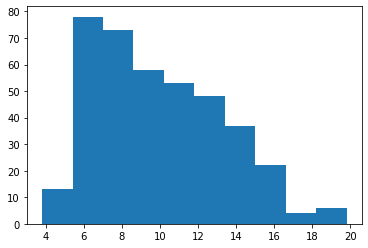

In [616]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df['kml'])

In [617]:
#sns.pairplot(df)

## 데이터정규화 : weight

- 수치데이터 컬럼마다 값의 범위가 다름
- 값의 범위 0 ~ 1 또는 -1 ~ 1 로 값을 설정 

In [618]:
df['weight']

0      3504.0
1      3693.0
2      3436.0
3      3433.0
4      3449.0
        ...  
393    2790.0
394    2130.0
395    2295.0
396    2625.0
397    2720.0
Name: weight, Length: 392, dtype: float64

In [619]:
# 방법 : 컬럼의 최대값의 절대값으로 전체 데이터 나누기 
abs(df['weight'].max()) 

5140.0

In [620]:
df['weight_nor']= df['weight'] / abs(df['weight'].max())
df['weight_nor'].min(), df['weight_nor'].max()

C:\Users\User\AppData\Local\Temp\ipykernel_15088\4076199435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight_nor']= df['weight'] / abs(df['weight'].max())


(0.31381322957198443, 1.0)

In [621]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   origin_label  392 non-null    category
 2   kml           392 non-null    float64 
 3   cylinders     392 non-null    int64   
 4   displacement  392 non-null    float64 
 5   horsepower    392 non-null    category
 6   weight        392 non-null    float64 
 7   acceleration  392 non-null    float64 
 8   model year    392 non-null    int64   
 9   origin        392 non-null    category
 10  car name      392 non-null    object  
 11  weight_nor    392 non-null    float64 
dtypes: category(3), float64(6), int64(2), object(1)
memory usage: 32.2+ KB


In [622]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [623]:
cor=df.corr()
cor

,mpg,kml,cylinders,displacement,weight,acceleration,model year,weight_nor
mpg,1.000000,1.000000,-0.777618,-0.805127,-0.832244,0.423329,0.580541,-0.832244
kml,1.000000,1.000000,-0.777618,-0.805127,-0.832244,0.423329,0.580541,-0.832244
cylinders,-0.777618,-0.777618,1.000000,0.950823,0.897527,-0.504683,-0.345647,0.897527
displacement,-0.805127,-0.805127,0.950823,1.000000,0.932994,-0.543800,-0.369855,0.932994
weight,-0.832244,-0.832244,0.897527,0.932994,1.000000,-0.416839,-0.309120,1.000000
acceleration,0.423329,0.423329,-0.504683,-0.543800,-0.416839,1.000000,0.290316,-0.416839
model year,0.580541,0.580541,-0.345647,-0.369855,-0.309120,0.290316,1.000000,-0.309120
weight_nor,-0.832244,-0.832244,0.897527,0.932994,1.000000,-0.416839,-0.309120,1.000000


<AxesSubplot:>

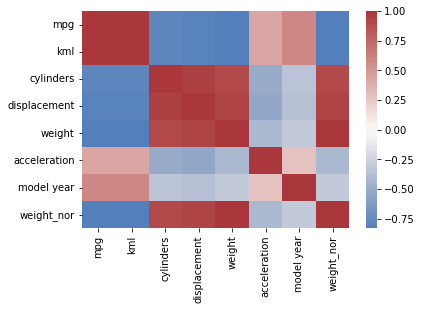

In [624]:
sns.heatmap(cor,center=0,cmap="vlag")

## ML - Linear Regression Model

In [625]:
X= df.drop(['mpg', 'origin_label', 'horsepower', 'model year', 'origin', 'car name'],axis='columns')
Y=df['kml']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print("train data length:",len(X_train))
print("test data length:",len(X_test))

train data length: 313
test data length: 79


In [640]:
X

,kml,cylinders,displacement,weight,acceleration,weight_nor
0,7.650,8,307.0,3504.0,12.0,0.681712
1,6.375,8,350.0,3693.0,11.5,0.718482
2,7.650,8,318.0,3436.0,11.0,0.668482
3,6.800,8,304.0,3433.0,12.0,0.667899
4,7.225,8,302.0,3449.0,10.5,0.671012
...,...,...,...,...,...,...
393,11.475,4,140.0,2790.0,15.6,0.542802
394,18.700,4,97.0,2130.0,24.6,0.414397
395,13.600,4,135.0,2295.0,11.6,0.446498
396,11.900,4,120.0,2625.0,18.6,0.510700


In [626]:
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [627]:
lr = LinearRegression()
lr.fit(X_train_scaled,Y_train)
Y_pred = lr.predict(X_test_scaled)

print('Coefficients: ', lr.coef_)
print('Intercept:',lr.intercept_)
print("train R2 Score:",lr.score(X_train_scaled,Y_train))
print("Test R2 Score:",lr.score(X_test_scaled,Y_test))
print("MSE:",mean_squared_error(Y_test,Y_pred))
print("RMSE:",mean_squared_error(Y_test,Y_pred,squared=False))

Coefficients:  [ 3.12344373e+00 -4.29195408e-16 -4.15734571e-16 -2.20121917e-16
 -4.97070726e-16 -6.78189163e-16]
Intercept: 9.866924920127795
train R2 Score: 1.0
Test R2 Score: 0.9410220699816928
MSE: 0.9211883069731285
RMSE: 0.9597855525965832


In [628]:
print('predict: ', Y_pred)

predict:  [ 6.72446837 13.67732887  6.38858139 14.44986893  7.73212931 14.48345762
  6.05269441 10.08333818  8.20237109  7.39624233  6.05269441  6.72446837
  5.71680743  5.04503347  8.06801629  8.06801629 11.76277308 10.75511214
 14.78575591 17.33849696 12.77043402 12.09866006  6.05269441  8.90773375
 12.53531314  6.05269441 10.08333818  5.38092045 14.8193446   7.56418582
 10.41922516  8.73979025  9.6802738  14.18115934  4.70914649  6.55652488
  6.05269441  7.9000728   5.71680743 11.3597087  11.93071657  8.47108067
 13.47579668 11.09099912  7.56418582 13.81168366  9.07567724 12.73684532
  8.20237109 11.76277308 16.666723   14.44986893  7.56418582  7.06035535
  9.7474512  16.46519081  6.72446837  7.39624233  8.06801629  7.76571801
 13.27426449 11.05741042 10.25128167 11.09099912  6.38858139  5.38092045
 11.59482959 13.03914361 10.75511214 13.34144189  9.7474512  11.76277308
  7.73212931 10.08333818 10.08333818  8.47108067 13.2406758   8.06801629
 13.00555491]


# keras

In [629]:
import tensorflow as tf

In [630]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow import keras
from tensorflow.keras import layers

In [631]:
model=Sequential(name='auto_mpg')

In [632]:
model.add(Dense(10, activation='relu', input_shape=(6, )))

In [633]:
model.add(Dense(30, activation='relu'))

In [634]:
model.add(Dense(1, activation='linear'))

In [635]:
model.summary()

Model: "auto_mpg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 10)                70        
                                                                 
 dense_45 (Dense)            (None, 30)                330       
                                                                 
 dense_46 (Dense)            (None, 1)                 31        
                                                                 
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


In [636]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [637]:
model.fit(X_train_scaled, Y_train, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 110.0888 - mean_squared_error: 110.0888
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 105.7721 - mean_squared_error: 105.7721
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 101.4328 - mean_squared_error: 101.4328
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 97.1627 - mean_squared_error: 97.1627
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 92.6564 - mean_squared_error: 92.6564
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 87.6999 - mean_squared_error: 87.6999
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 81.9603 - mean_squared_error: 81.9603
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 74.9114 - mean_squared_error: 74.9114
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 67.0199 - mean_squared_error: 67.

10/10 [==============================] - 0s 1ms/step - loss: 1.3743 - mean_squared_error: 1.3743
Epoch 76/100
10/10 [==============================] - 0s 1ms/step - loss: 1.3290 - mean_squared_error: 1.3290
Epoch 77/100
10/10 [==============================] - 0s 1ms/step - loss: 1.2809 - mean_squared_error: 1.2809
Epoch 78/100
10/10 [==============================] - 0s 1ms/step - loss: 1.2386 - mean_squared_error: 1.2386
Epoch 79/100
10/10 [==============================] - 0s 1ms/step - loss: 1.1950 - mean_squared_error: 1.1950
Epoch 80/100
10/10 [==============================] - 0s 1ms/step - loss: 1.1528 - mean_squared_error: 1.1528
Epoch 81/100
10/10 [==============================] - 0s 1ms/step - loss: 1.1142 - mean_squared_error: 1.1142
Epoch 82/100
10/10 [==============================] - 0s 1ms/step - loss: 1.0753 - mean_squared_error: 1.0753
Epoch 83/100
10/10 [==============================] - 0s 1ms/step - loss: 1.0385 - mean_squared_error: 1.0385
Epoch 84/100
10/10 [===

In [638]:
model.evaluate(X_test_scaled, Y_test)

3/3 [==============================] - 0s 1ms/step - loss: 2.0078 - mean_squared_error: 2.0078


[2.0078353881835938, 2.0078353881835938]

In [639]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, model.predict(X_test_scaled))

3/3 [==============================] - 0s 983us/step


2.007835380848193